In [1]:
import torch
import sys
sys.path.insert(0,'/home/gridsan/gschuette/ChromoGen/src/data_utils/SampleClass/')
from Coordinates import Coordinates

In [2]:
torch.manual_seed(0)
nbeads = 128
random_walk = torch.empty(1,nbeads,3)
random_walk.normal_()
random_walk/= random_walk.norm(dim=-1,keepdim=True)
random_walk.cumsum_(1)
random_walk = Coordinates(random_walk)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7ff0fab6d7e0>)

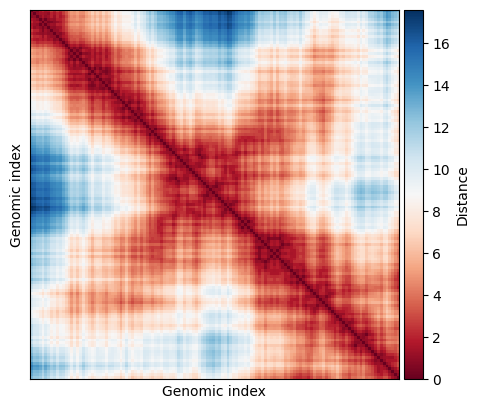

In [3]:
random_walk.distances.plot()

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7ff0887e75e0>)

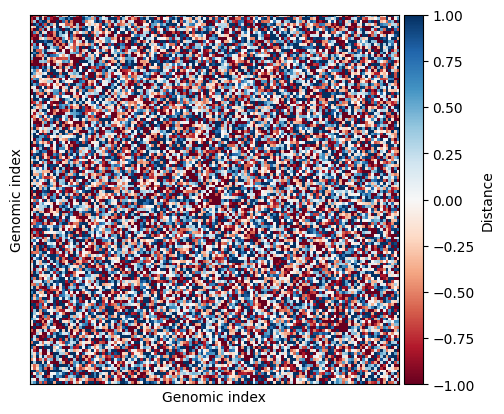

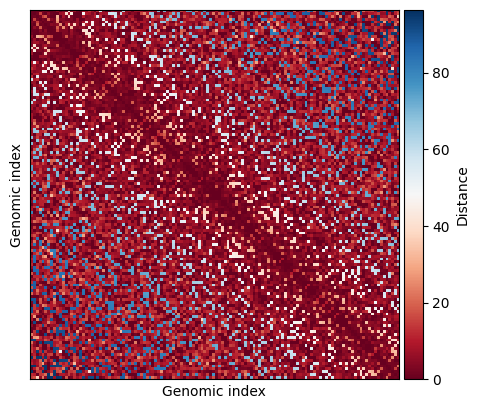

In [31]:
torch.manual_seed(1)

# Populate a distance matrix with random Gaussian noise
pure_noise = random_walk.distances
pure_noise.values.normal_().clamp_(-1,1-1e-7)

# Make symmetric, as is always the case for the folded data
n = pure_noise.num_beads
i,j = torch.triu_indices(n,n,1)
pure_noise._values[:,j,i] = pure_noise.values[:,i,j]

# Also, the diagonal is always manually set to 0, so no noise there. 
# Note that 0 is actually -1 in the normalized space, so fill with -1.
pure_noise.values.diagonal(offset=0,dim1=-1,dim2=-2).fill_(-1)

# Preserve the pure noise case
pure_noise_norm = pure_noise.clone()

# Now, get the unnormalized data
pure_noise._values+=1
pure_noise._values/=2
pure_noise.unnormalize_()

# Plot them both for reference
pure_noise_norm.plot(vmin=-1,vmax=1)
pure_noise.plot()

In [28]:
pure_noise.values.diagonal(offset=0,dim1=-1,dim2=-2).fill_(0)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7ff0885dac50>)

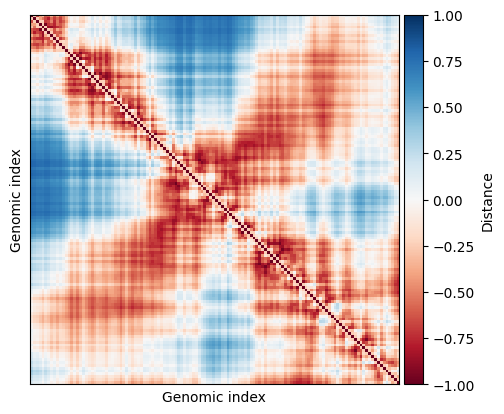

In [37]:
random_walk_norm = random_walk.distances.normalize()
random_walk_norm._values*=2
random_walk_norm._values-=1
random_walk_norm.plot(vmin=-1,vmax=1)

#### For subgroup 

In [41]:
torch.manual_seed(0)
nbeads = 12_500 # 250 Mb @ 20 kb
random_walk = torch.empty(1,nbeads,3)
random_walk.normal_()
random_walk/= random_walk.norm(dim=-1,keepdim=True)
random_walk.cumsum_(1)
random_walk = Coordinates(random_walk)
rwd = random_walk.distances

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7ff0a8660c70>)

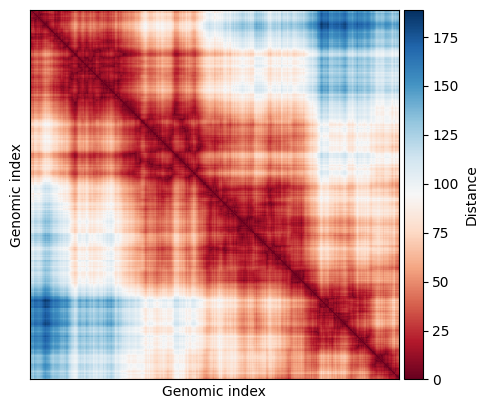

In [42]:
rwd.plot()

In [43]:
12_500/5

2500.0

In [44]:
6.4e9 / 1e5

64000.0

In [46]:
# Using 1 Mb resolution
L = 6_400 # Number of bins in whole genome 
l = 1024  # Number of bins per region
N = 10    # Total number of regions to use, including overlap
phi = (l*N-L)/(2*(N-1))
phi

213.33333333333334